# Here we will learn how to remove trend and Seasonality from our data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
miles_df = pd.read_csv(r"D:\courses\Time_Series\Forecasting_Resources\DataandCode\us-airlines-monthly-aircraft-miles-flown.csv",
                      header=0,
                      parse_dates=[0])

In [3]:
miles_df.head(10)

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
5,1963-06-01,9644
6,1963-07-01,10466
7,1963-08-01,10748
8,1963-09-01,9963
9,1963-10-01,8194


In [4]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [5]:
miles_df.head()

,Month,MilesMM,lag1
0,1963-01-01,6827,NaN
1,1963-02-01,6178,6827.0
2,1963-03-01,7084,6178.0
3,1963-04-01,8162,7084.0
4,1963-05-01,8462,8162.0


Now to remove trend we need to subtract this leg one values from this MilesMM values. The resultant series should not contain any Trend. After subtracting our differencing this lag1 value

In [7]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1) # This should not contain any trend

In [8]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

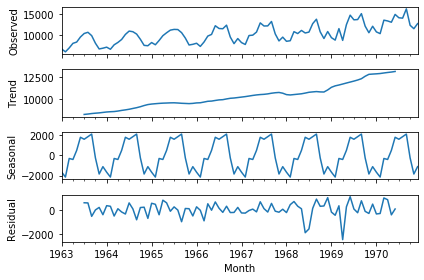

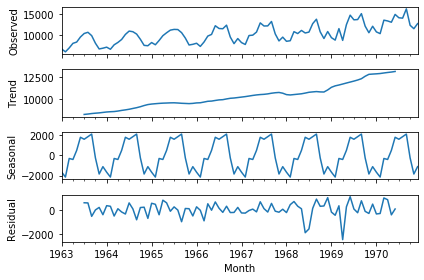

In [10]:
# Decomposing plot of our original Miles series

miles_df.index = miles_df['Month']
res_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
res_a.plot()

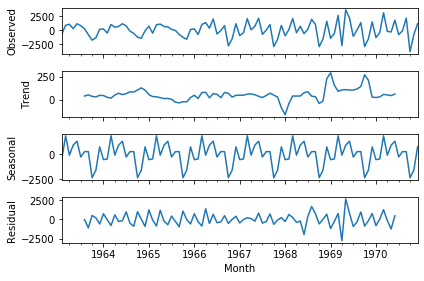

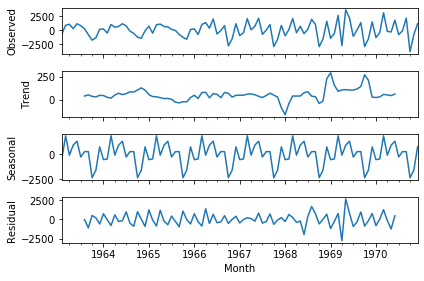

In [13]:
# This is the Decompose model of our difference series

# MilesMM_diff_1 1st value is NaN, To avoid that we will be using iloc

miles_df.index = miles_df['Month']
res_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
res_b.plot()

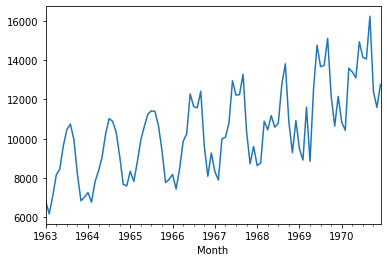

In [14]:
miles_df['MilesMM'].plot()

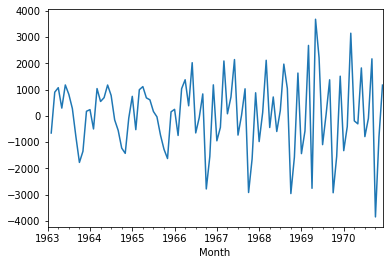

In [15]:
miles_df['MilesMM_diff_1'].plot()

In [18]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

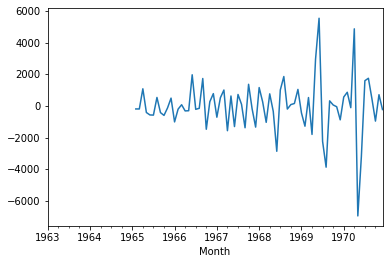

In [19]:
miles_df['MilesMM_diff_12'].plot()

In [27]:
miles_df.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,NaN,NaN
1963-03-01,1963-03-01,7084,6178.0,NaN,NaN
1963-04-01,1963-04-01,8162,7084.0,NaN,NaN
1963-05-01,1963-05-01,8462,8162.0,NaN,NaN
1963-06-01,1963-06-01,9644,8462.0,NaN,NaN
1963-07-01,1963-07-01,10466,9644.0,NaN,NaN
1963-08-01,1963-08-01,10748,10466.0,NaN,NaN
1963-09-01,1963-09-01,9963,10748.0,NaN,NaN


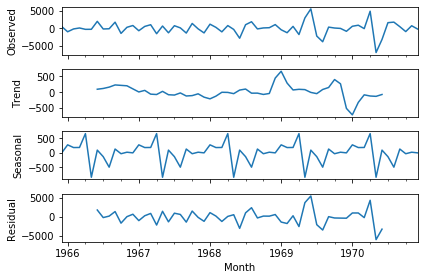

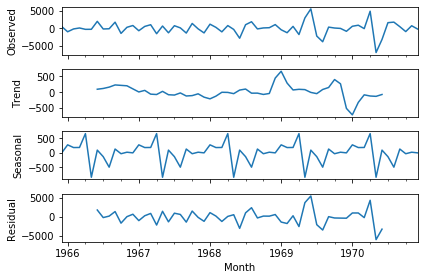

In [28]:
result_c = seasonal_decompose(miles_df.iloc[35:,4],model='additive')
result_c.plot()

## Train Test Split

In [33]:
temp_df = pd.read_csv(r"D:\courses\Time_Series\Forecasting_Resources\DataandCode\daily-min-temperatures.csv",
                      header=0,
                      parse_dates=[0])

This is 10 years of our data, we will be using 8 years of data for Training and 2 years of data for Testing

In [34]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [35]:
temp_df.shape

(3650, 2)

In [36]:
temp_df.shape[0]

3650

In [37]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [38]:
train = temp_df[0:train_size]

In [39]:
test = temp_df[train_size:]

In [41]:
train.shape

(2920, 2)

In [42]:
test.shape

(730, 2)